<a href="https://colab.research.google.com/github/varshiniboga/loan-approval-prediction/blob/main/FPR_Code_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install progress

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9644 sha256=337ffa21e01fcd753264c24010f3994acb2c89b16d7bfd99a84508e218079727
  Stored in directory: c:\users\boga sreevarshini\appdata\local\pip\cache\wheels\b5\b9\86\f1bcc2a1de592673c4192d9459c0da1100d70212f38b6bd2a4
Successfully built progress



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy, pandas, os,datetime
import matplotlib.pyplot as vsloan
import seaborn as viz_se
import datetime
from IPython.display import display, HTML
from sklearn import preprocessing, model_selection, feature_selection, metrics, utils, decomposition,pipeline
from sklearn import linear_model, ensemble, tree, svm, neighbors
import pickle
from time import sleep
#from progress import bar
from matplotlib import rcParams

## Data Loading

In [ ]:
def ReadLoanData():
    loan_data=pandas.read_csv("loan_approval_dataset.csv")
    print("Enlisted Records: {}\nEnlisted Features: {}".format(len(loan_data),len(loan_data.columns)))
    lncat=loan_data.dtypes[loan_data.dtypes=='object'].index.tolist()
    lnnms=loan_data.dtypes[loan_data.dtypes!='object'].index.tolist()
    print("Object Type Features: {}\nNumerical Type Features: {}".format(len(lncat),len(lnnms)))
    return loan_data
LnAprv=ReadLoanData()
LnAprv.head()

Enlisted Records: 4269
Enlisted Features: 13
Object Type Features: 3
Numerical Type Features: 10


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
LnAprv[' loan_status'].value_counts()

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [ ]:
def CleanFeatures(loan_data):
    print("Load Record Information")
    print(loan_data.info())
    print("Enlisted Missing Values")
    print(loan_data.isna().sum())
    lncat=loan_data.dtypes[loan_data.dtypes=='object'].index.tolist()
    lnnms=loan_data.dtypes[loan_data.dtypes!='object'].index.tolist()
    if sum(loan_data.isna().sum())!=0:
        for lc in lncat:
            loan_data[lc]=loan_data[lc].fillna(loan_data[lc].mode()[0])
        for ln in lnnms:
            loan_data[ln]=loan_data[ln].fillna(loan_data[ln].mean())
    print("Enlisted Missing Values after Cleaning")
    print(loan_data.isna().sum())
    return loan_data
MsLnData=CleanFeatures(LnAprv)
MsLnData.head()

Load Record Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 4

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
dtfets=MsLnData.columns.tolist()
print("Column Names of Collected data: ")
print(dtfets,"\n")
ndtfets=[]
for c in dtfets:
    ndtfets.append(c.lstrip(" "))
MsLnData.columns=ndtfets
print("Column Names of Collected Data After Stripping: ")
print(MsLnData.columns.tolist())

Column Names of Collected data: 
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status'] 

Column Names of Collected Data After Stripping: 
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


## Data Visualization

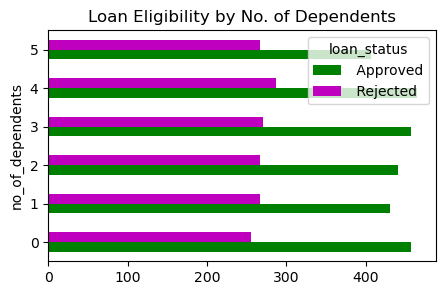

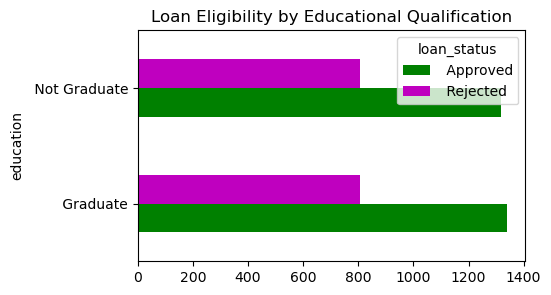

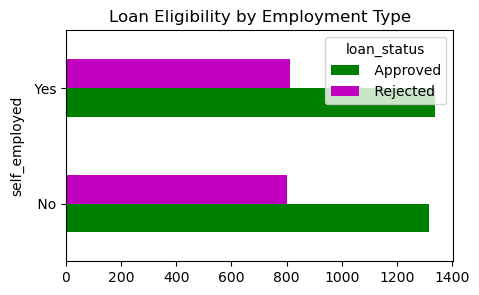

In [ ]:
def FetCatVz(loan_data,f1,f2,nmft):
    pandas.crosstab(loan_data[f1],loan_data[f2]).plot(kind='barh',title="Loan Eligibility by {}".format(nmft),figsize=(5,3),color=["g","m"])
    vsloan.show()
vizfet=["no_of_dependents","education","self_employed"]
vizfetnm=["No. of Dependents","Educational Qualification", "Employment Type"]
for l in range(len(vizfet)):
    FetCatVz(MsLnData,vizfet[l],"loan_status",vizfetnm[l])

In [ ]:
MsLnData.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


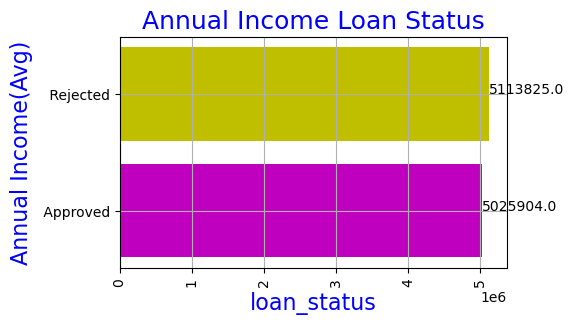

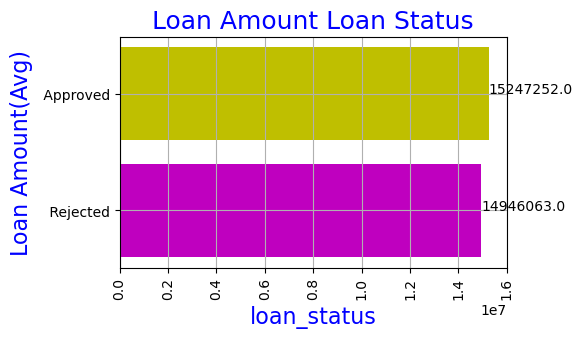

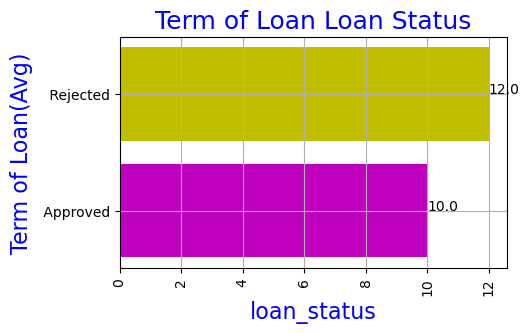

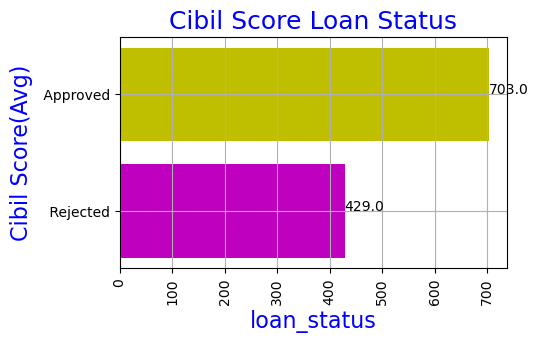

In [ ]:
def FetNmVz(loan_data,ft_trg,anysft, ttlnm):
    # Phillipinary data analysis
    filter_data=loan_data.groupby(["{}".format(ft_trg)]).agg({"{}".format(anysft): [numpy.mean]}).sort_values(by=("{}".format(anysft),"mean"),ascending=False)
    dtidxs=filter_data.index.tolist()
    dtvals=numpy.round_(filter_data.values.flatten())
    visualdf=pandas.DataFrame({
    "{}".format(ft_trg):dtidxs,
    "{}".format(anysft):dtvals
    })
    visualdf=visualdf.sort_values(by="{}".format(anysft),ascending=True)
    vsloan.figure(figsize=(5,3))
    vsloan.title("{} Loan Status".format(ttlnm,ft_trg),fontsize=18,color="b")
    vsloan.barh(visualdf["{}".format(ft_trg)],visualdf["{}".format(anysft)],color=["m","y","b"])
    vsloan.xticks(rotation=90)
    vsloan.xlabel("{}".format(ft_trg),fontsize=16,color="b")
    vsloan.ylabel("{}(Avg)".format(ttlnm),fontsize=16,color="b")
    for vid, vvl in enumerate(visualdf["{}".format(anysft)]):
        vsloan.text(vvl, vid, str(vvl))
    vsloan.grid()
    vsloan.show()
vizfet2=["income_annum","loan_amount","loan_term","cibil_score"]
vizfetnm2=["Annual Income","Loan Amount", "Term of Loan","Cibil Score"]
for d in range(len(vizfet2)):
    FetNmVz(MsLnData,"loan_status",vizfet2[d],vizfetnm2[d])

In [ ]:
numfets=MsLnData.dtypes[MsLnData.dtypes!='object'].index.tolist()
LoanMNums=MsLnData[numfets]
LoanMNums['loan_status']=MsLnData['loan_status']
LoanMNums

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


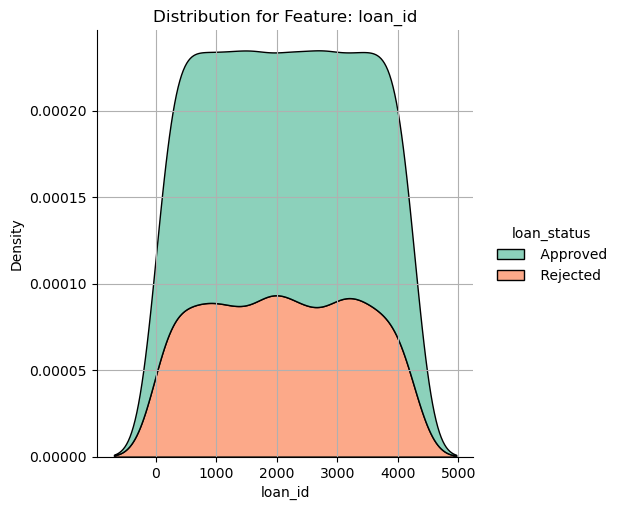

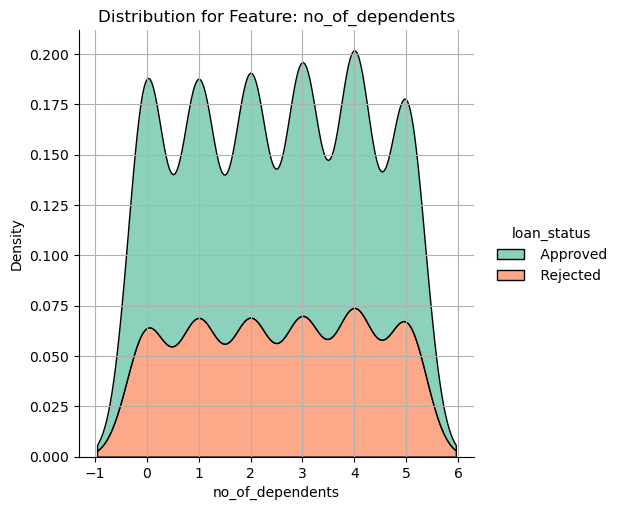

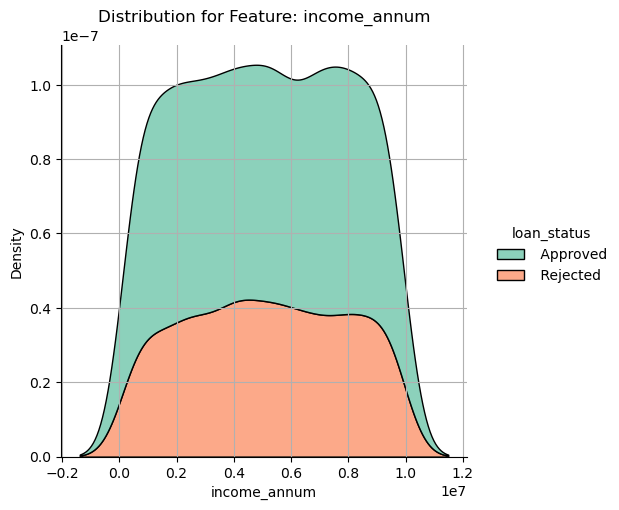

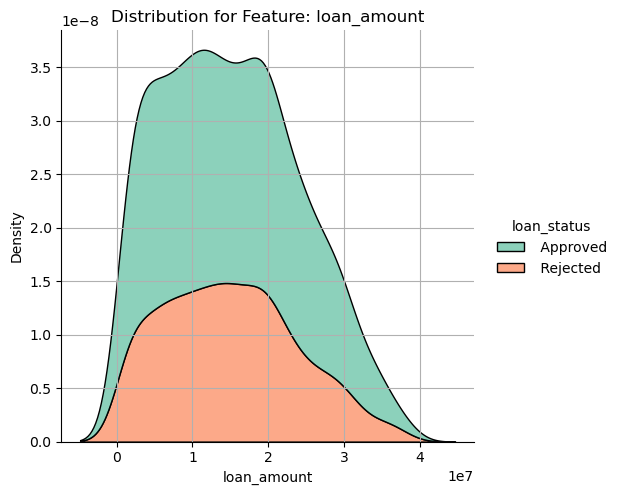

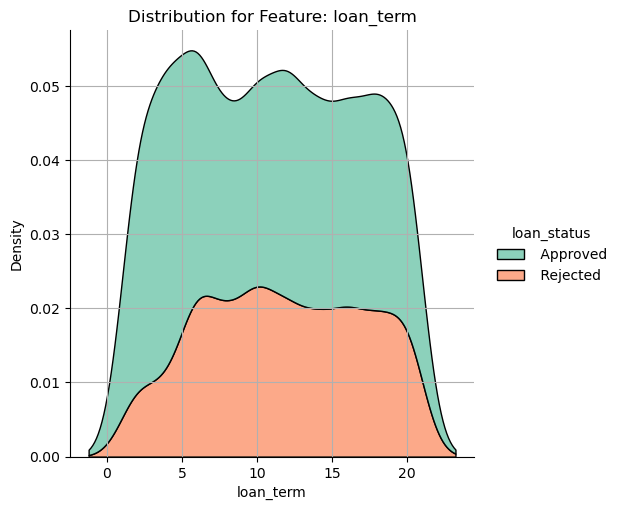

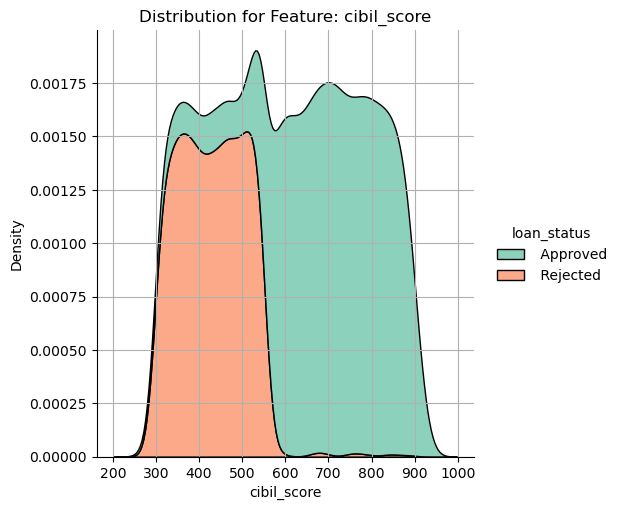

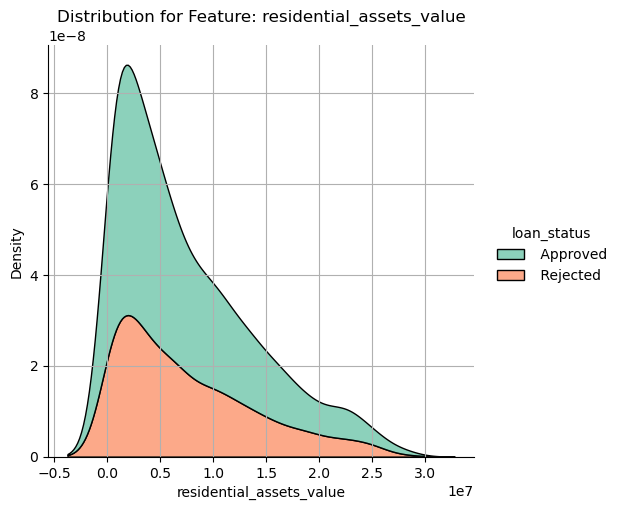

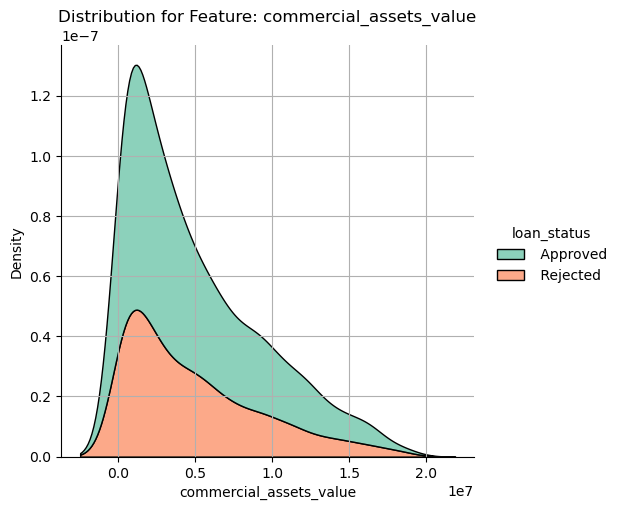

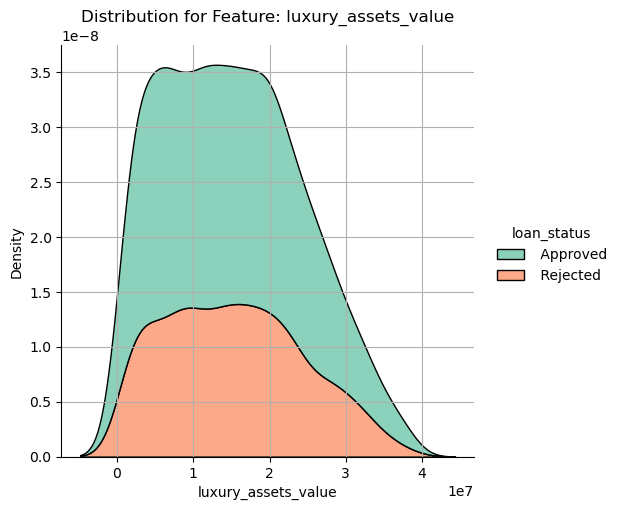

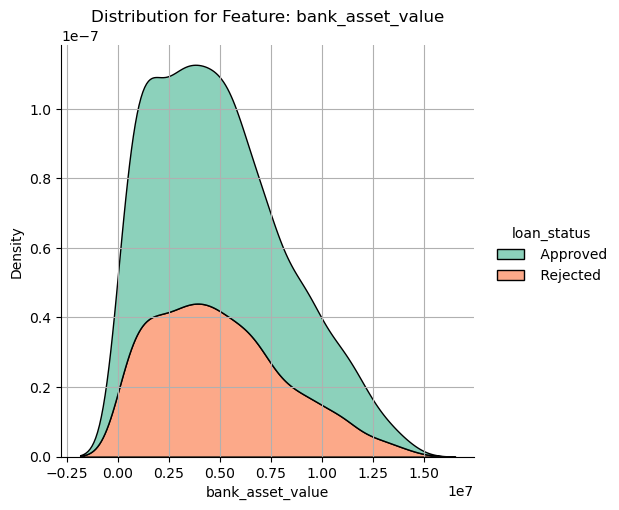

In [ ]:
# Distribution Plot
cols=LoanMNums.columns.tolist()
for x in range(len(cols[:-1])):
    rcParams['figure.figsize'] = 5,3
    #viz_se.displot(MsLnData, x="income_annum",hue="loan_status",stat="density",element="step",multiple="stack")
    viz_se.displot(LoanMNums, x=cols[x],hue="loan_status",kind="kde",multiple="stack",fill=True,palette="Set2")
    vsloan.title("Distribution for Feature: {}".format(cols[x]))
    vsloan.grid()
    vsloan.show()

## Feature Encoding

In [ ]:
def EncLoanFets(loan_data):
    loan_data1=loan_data.copy()
    print("Feature Types Before Encoding")
    print(loan_data1.info())
    lncat=loan_data1.dtypes[loan_data1.dtypes=='object'].index.tolist()
    for l in lncat:
        loan_data1[l]=loan_data1[l].replace(loan_data1[l].unique(),[x for x in range(len(loan_data1[l].unique()))])
    print(loan_data1.loan_status.unique())
    loan_data1['loan_status']=loan_data1['loan_status'].replace(loan_data1.loan_status.unique(),["Approved","Rejected"])
    print("Feature Types After Encoding")
    print(loan_data1.info())

    return loan_data1
EnLnData=EncLoanFets(MsLnData)
EnLnData.head()

Feature Types Before Encoding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Outlier Detection and Elimination

In [ ]:
def BoxPlotLoan(loan_data,spl):
    loan_data.plot(kind='box',figsize=(8,4))
    vsloan.title("Detection of Outliers Through Boxplot({})".format(spl),fontsize=17,color="b")
    vsloan.xlabel("Features",fontsize=15,color="b")
    vsloan.xticks(rotation=90)
    vsloan.ylabel("Value",fontsize=  15,color="b")
    vsloan.grid()
    vsloan.show()
def LoanPCA(loan_data,col):
    arrloan_data=numpy.array(loan_data.iloc[:,:-1])
    loanpcamd = decomposition.PCA(n_components=2)
    loanpcamd.fit(arrloan_data)
    cmps=["Comp-{}".format(i+1) for i in range(len(loanpcamd.explained_variance_ratio_.tolist()))]
    vsloan.figure(figsize=(5,3))
    vsloan.title("Maximum Variance Value: \n{}".format(round(max(loanpcamd.explained_variance_ratio_),8)),fontsize=18)
    vsloan.bar(cmps,loanpcamd.explained_variance_ratio_.tolist(),width=0.5,color=col)
    vsloan.xlabel("Components",fontsize=14)
    vsloan.ylabel("Variance",fontsize=14)
    vsloan.grid()
    vsloan.show()
    return loanpcamd.explained_variance_ratio_
def Normln(loan_data):
    mmnorm_md = preprocessing.MinMaxScaler()
    nrm_loan_data=mmnorm_md.fit_transform(loan_data)
    return nrm_loan_data

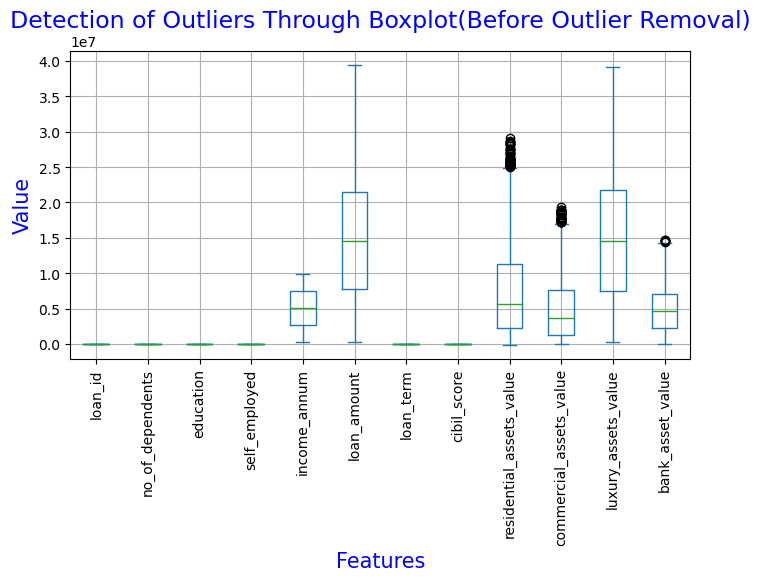

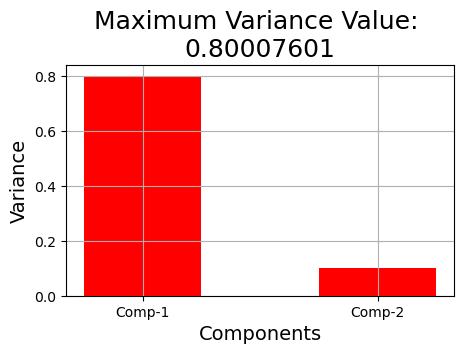

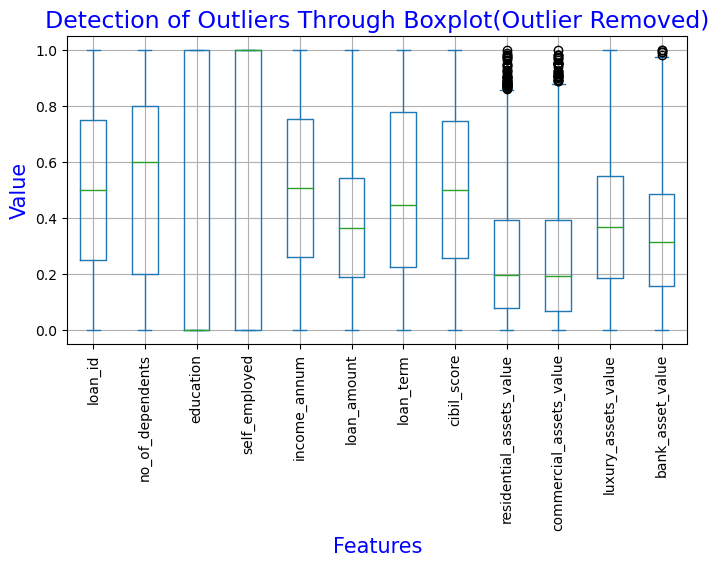

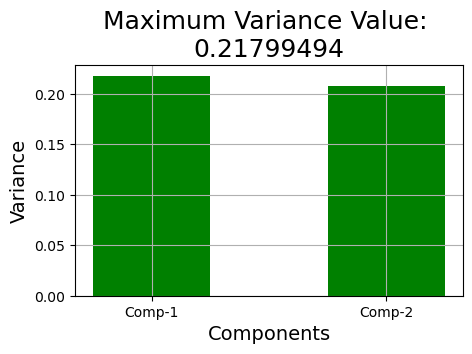

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,0.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,Approved
1,0.000234,0.0,1.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,Rejected
2,0.000469,0.6,0.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,Rejected
3,0.000703,0.6,0.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,Rejected
4,0.000937,1.0,1.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,Rejected
5,0.001172,0.0,0.0,1.0,0.474227,0.336735,0.444444,0.031667,0.236301,0.427835,0.344473,0.346939,Rejected
6,0.001406,1.0,0.0,0.0,0.876289,0.834184,0.111111,0.630000,0.773973,0.762887,0.742931,0.292517,Approved
7,0.001640,0.4,0.0,1.0,0.567010,0.375000,1.000000,0.136667,0.455479,0.293814,0.295630,0.408163,Rejected
8,0.001874,0.0,0.0,1.0,0.061856,0.048469,1.000000,0.803333,0.047945,0.041237,0.064267,0.040816,Approved
9,0.002109,1.0,1.0,0.0,0.092784,0.102041,0.444444,0.146667,0.113014,0.072165,0.077121,0.108844,Rejected


In [ ]:
BoxPlotLoan(EnLnData.drop('loan_status',axis=1), "Before Outlier Removal")
ResLoanPca=[]
ResLoanPca.append(LoanPCA(EnLnData.drop('loan_status',axis=1),"r"))

out_with_comp=[]
varindic=[]
for alo in ResLoanPca:
    for al in alo:
        if al>0.6:
            out_with_comp.append("Outlier in Component-{} with Variance Value {}".format(alo.tolist().index(al)+1,round(al,5)))
            varindic.append(True)
if len(varindic)==1 and True in varindic:
    EnNrmLnData=Normln(EnLnData.drop('loan_status',axis=1))
EnNrmLnData=pandas.DataFrame(EnNrmLnData,columns=EnLnData.drop('loan_status',axis=1).columns.tolist())
BoxPlotLoan(EnNrmLnData, "Outlier Removed")
LoanPCA(EnNrmLnData,"g")
EnNrmLnData['loan_status']=EnLnData['loan_status'].tolist()
EnNrmLnData.head(10)

## Feature Selection

In [ ]:
def MdFt1(loan_data):
    print("--------------------------------------------------------------")
    print("Feature Selection using Chi-Squred")
    print("--------------------------------------------------------------")
    ln_prd=loan_data.drop([loan_data.columns.tolist()[-1]],axis=1)
    ln_trg=loan_data[loan_data.columns.tolist()[-1]]
    ln_trg=ln_trg.replace(ln_trg.unique(),[x for x in range(len(ln_trg.unique()))])
    mdl_fetsl1=feature_selection.SelectKBest(feature_selection.chi2, k=int(len(loan_data.columns)*0.7))
    mdl_fetsl1.fit(ln_prd, ln_trg)
    print("Selected Features using Chi-Squred: \n",*ln_prd.columns[mdl_fetsl1.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    return ln_prd.columns[mdl_fetsl1.get_support()]

In [ ]:
def MdFt2(loan_data):
    print("--------------------------------------------------------------")
    print("Feature Selection using RFE")
    print("--------------------------------------------------------------")
    ln_prd=loan_data.drop([loan_data.columns.tolist()[-1]],axis=1)
    ln_trg=loan_data[loan_data.columns.tolist()[-1]]
    ln_trg=ln_trg.replace(ln_trg.unique(),[x for x in range(len(ln_trg.unique()))])
    mdl_fetsl2 = feature_selection.RFE(estimator=linear_model.LogisticRegression(),n_features_to_select = int(len(loan_data.columns)*0.7), step = 0.7)
    mdl_fetsl22=mdl_fetsl2.fit(ln_prd,ln_trg)
    print("Selected Features using RFE: \n",*ln_prd.columns[mdl_fetsl22.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    return ln_prd.columns[mdl_fetsl22.get_support()]

In [ ]:
FinalFeatures=[]
LnChqFt=MdFt1(EnNrmLnData)
LnRFEFt=MdFt2(EnNrmLnData)
for x in LnChqFt:
    if x in LnRFEFt:
        FinalFeatures.append(x)

--------------------------------------------------------------
Feature Selection using Chi-Squred
--------------------------------------------------------------
Selected Features using Chi-Squred: 

loan_id
no_of_dependents
income_annum
loan_amount
loan_term
cibil_score
residential_assets_value
commercial_assets_value
luxury_assets_value
--------------------------------------------------------------
--------------------------------------------------------------
Feature Selection using RFE
--------------------------------------------------------------
Selected Features using RFE: 

loan_id
no_of_dependents
income_annum
loan_amount
loan_term
cibil_score
commercial_assets_value
luxury_assets_value
bank_asset_value
--------------------------------------------------------------


In [ ]:
print("\nFinally Selected Features: \n")
print(*FinalFeatures, sep="\n")


Finally Selected Features: 

loan_id
no_of_dependents
income_annum
loan_amount
loan_term
cibil_score
commercial_assets_value
luxury_assets_value


## Preparing Data

In [ ]:
vlcln=EnNrmLnData['loan_status'].value_counts()
print("The 'Approved' class contains {} Instances ({}%)".format(vlcln.tolist()[0],round((vlcln.tolist()[0]/sum(vlcln.tolist())),2)*100))
print("The 'Rejected' class contains {} Instances ({}%)".format(vlcln.tolist()[1],round((vlcln.tolist()[1]/sum(vlcln.tolist())),2)*100))
if (vlcln.tolist()[0] > vlcln.tolist()[1]) or (vlcln.tolist()[0] < vlcln.tolist()[1]):
    print("Data is Imbalnaced")
else:
    print("Data is Balanced")

The 'Approved' class contains 2656 Instances (62.0%)
The 'Rejected' class contains 1613 Instances (38.0%)
Data is Imbalnaced


In [ ]:
def LoanDataPrep(loan_data,finsel):
    print("Initial Class Distribution: \n")
    print(loan_data['loan_status'].value_counts())
    apr_dtln=loan_data[loan_data['loan_status']=='Approved']
    rjt_dtln=loan_data[loan_data['loan_status']=='Rejected']
    rjt_dtln1=utils.resample(rjt_dtln, replace = True, n_samples = loan_data['loan_status'].value_counts().tolist()[0], random_state = 0)
    #aprvd1=utils.resample(aprvd, replace = True, n_samples = int(len(aprvd)*2), random_state = 0)
    loan_data1=pandas.concat([apr_dtln,rjt_dtln1]).sample(frac=1).reset_index(drop=True)
    print("Final Class Distribution: \n")
    print(loan_data1['loan_status'].value_counts())
    loan_datapred=loan_data1[finsel]
    loan_datatarget=loan_data1[loan_data.columns.tolist()[-1]]
    display(HTML(loan_datapred.head(10).to_html()))
    XLoanTr, XLoanTs, yLoanTr, yLoanTs=model_selection.train_test_split(loan_datapred, loan_datatarget, test_size=0.25, random_state=42)
    return XLoanTr, XLoanTs, yLoanTr, yLoanTs


XLoanTrain, XLoanTest, yLoanTrain, yLoanTest=LoanDataPrep(EnNrmLnData,FinalFeatures)
print("Distribution of Classes in Train Data: \n")
print(yLoanTrain.value_counts())
print("Distribution of Classes in Test Data: \n")
print(yLoanTest.value_counts())

Initial Class Distribution: 

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
Final Class Distribution: 

loan_status
Approved    2656
Rejected    2656
Name: count, dtype: int64


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,commercial_assets_value,luxury_assets_value
0,0.390815,0.0,0.206186,0.155612,0.111111,0.923333,0.082474,0.159383
1,0.317010,0.6,0.257732,0.147959,0.666667,0.550000,0.144330,0.264781
2,0.009841,0.6,0.123711,0.079082,0.222222,0.400000,0.077320,0.092545
3,0.497657,1.0,0.711340,0.387755,0.111111,0.290000,0.463918,0.568123
4,0.057873,0.0,0.948454,0.681122,0.444444,0.393333,0.087629,0.861183
5,0.783739,0.0,0.195876,0.112245,0.000000,0.265000,0.067010,0.200514
6,0.393861,0.2,0.783505,0.627551,0.222222,0.333333,0.515464,0.416452
7,0.894096,0.8,0.134021,0.094388,0.888889,0.676667,0.139175,0.105398
8,0.296392,0.2,0.814433,0.716837,0.222222,0.740000,0.541237,0.552699
9,0.721884,0.6,0.824742,0.729592,0.444444,0.245000,0.757732,0.748072


Distribution of Classes in Train Data: 

loan_status
Rejected    2014
Approved    1970
Name: count, dtype: int64
Distribution of Classes in Test Data: 

loan_status
Approved    686
Rejected    642
Name: count, dtype: int64


## Tuning Parameters of Models

In [ ]:
ClfLoanPredTuned=[
    tree.DecisionTreeClassifier(min_weight_fraction_leaf=0.01),
    neighbors.KNeighborsClassifier()
]
ClfLoanNm=[
    "Decision Tree",
    "K-Neighbors"
]

HypTunes=[
    [{"criterion":['gini', 'entropy'],"max_features":['sqrt', 'log2']}],
    [{"n_neighbors":list(range(2,5)),"weights":['uniform', 'distance']}]
]
prms, tms= [], []
for c in range(len(ClfLoanPredTuned)):
    print("____________________________________________________")
    print("Tuning {}".format(ClfLoanNm[c]))
    print("____________________________________________________")
    t1 = datetime.datetime.now()
    GSModel = model_selection.GridSearchCV(ClfLoanPredTuned[c], HypTunes[c], cv = 5, scoring='accuracy')
    GSModel.fit(XLoanTrain, yLoanTrain)
    ClfLoanPredTuned[c]=GSModel.best_estimator_
    t2 = datetime.datetime.now()
    delta = t2 - t1
    ElapsedTime=delta.total_seconds()
    print("Time Taken for Tuning '{}': {} Seconds".format(ClfLoanNm[c],ElapsedTime))
    print("____________________________________________________")
    print("{} Tuning Complete".format(ClfLoanNm[c]))
    print("____________________________________________________")
    prms.append(GSModel.best_estimator_)
    tms.append(ElapsedTime)
ModlTuneTimeDf=pandas.DataFrame({"Classifier":ClfLoanNm,"Tuned_Parameters":prms,"Tuning_Time(Sec)":tms})
ModlTuneTimeDf

____________________________________________________
Tuning Decision Tree
____________________________________________________
Time Taken for Tuning 'Decision Tree': 0.256288 Seconds
____________________________________________________
Decision Tree Tuning Complete
____________________________________________________
____________________________________________________
Tuning K-Neighbors
____________________________________________________
Time Taken for Tuning 'K-Neighbors': 1.170479 Seconds
____________________________________________________
K-Neighbors Tuning Complete
____________________________________________________


,Classifier,Tuned_Parameters,Tuning_Time(Sec)
0,Decision Tree,"DecisionTreeClassifier(criterion='entropy', ma...",0.256288
1,K-Neighbors,"KNeighborsClassifier(n_neighbors=4, weights='d...",1.170479


In [ ]:
ClfLoanPredTuned

[DecisionTreeClassifier(criterion='entropy', max_features='log2',
                        min_weight_fraction_leaf=0.01),
 KNeighborsClassifier(n_neighbors=4, weights='distance')]

## Prediction

In [ ]:
ClfLoanPred=[
    tree.DecisionTreeClassifier(min_weight_fraction_leaf=0.01),
    neighbors.KNeighborsClassifier()
]
ModelNm=[
    "Decision Tree",
    "K-Neighbors"
]

_____________________________________________________________________________
                            Decision Tree 
_____________________________________________________________________________


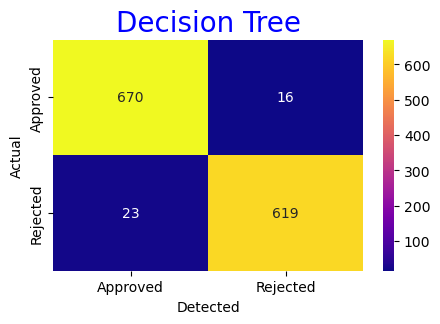


Test Accuracy: 97.06%


Train Accuracy: 97.79%


Classification Report for Decision Tree 

              precision    recall  f1-score   support

    Approved       0.97      0.98      0.97       686
    Rejected       0.97      0.96      0.97       642

    accuracy                           0.97      1328
   macro avg       0.97      0.97      0.97      1328
weighted avg       0.97      0.97      0.97      1328

_____________________________________________________________________________
                            K-Neighbors 
_____________________________________________________________________________


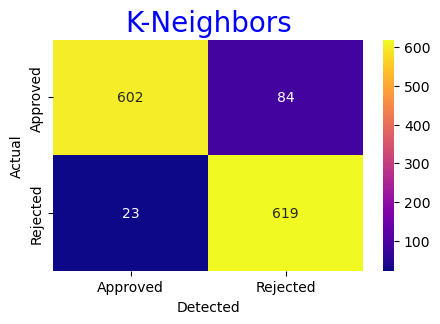


Test Accuracy: 91.94%


Train Accuracy: 95.28%


Classification Report for K-Neighbors 

              precision    recall  f1-score   support

    Approved       0.96      0.88      0.92       686
    Rejected       0.88      0.96      0.92       642

    accuracy                           0.92      1328
   macro avg       0.92      0.92      0.92      1328
weighted avg       0.92      0.92      0.92      1328

_____________________________________________________________________________


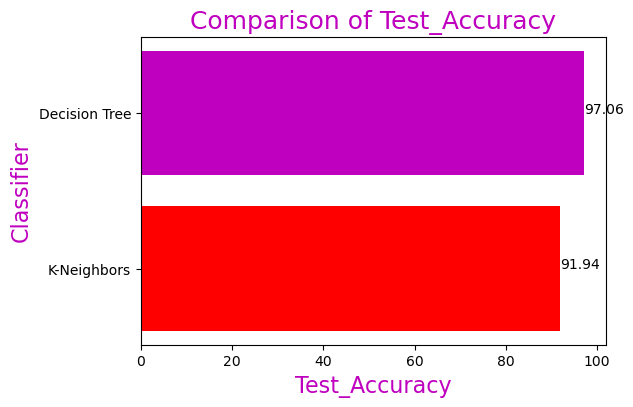

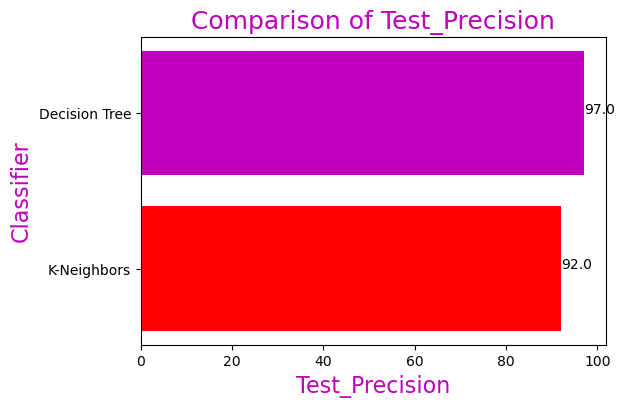

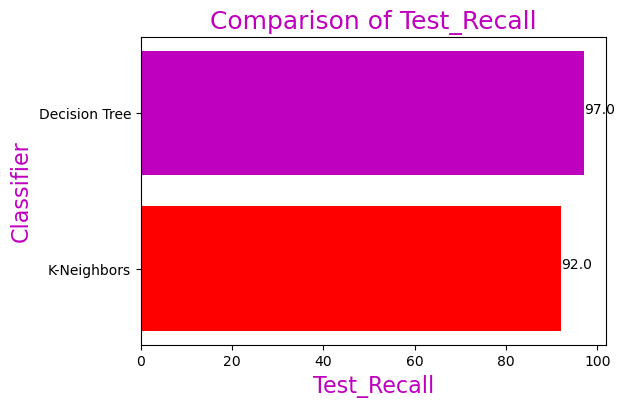

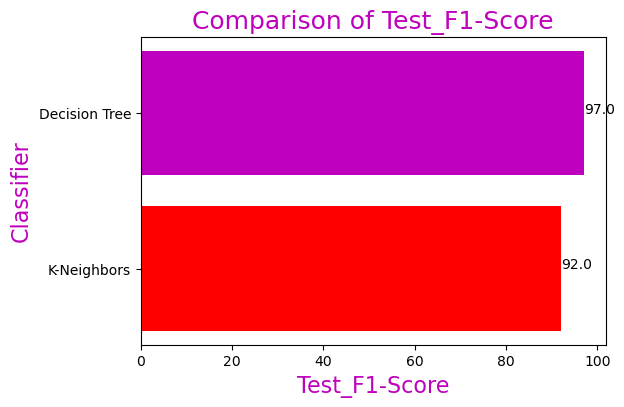

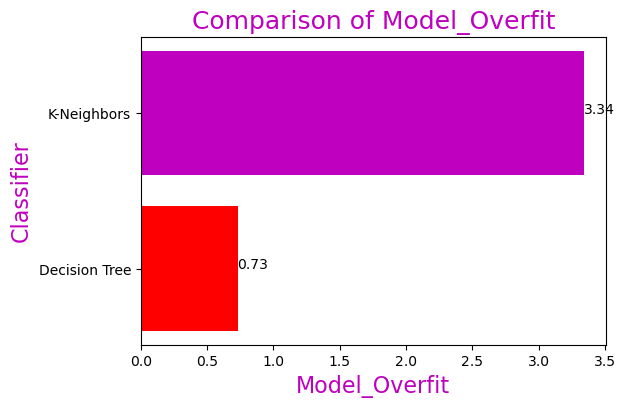

,Classifier,Train_Accuracy,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score,Model_Overfit
0,Decision Tree,97.79,97.06,97.0,97.0,97.0,0.73
1,K-Neighbors,95.28,91.94,92.0,92.0,92.0,3.34


In [ ]:
LoanPredict_List=[[],[],[],[],[],[]]
Crossvls=10
print("_____________________________________________________________________________")
for i in range(len(ClfLoanPred)):
    print("                            {} ".format(ModelNm[i]))
    print("_____________________________________________________________________________")
    MetCross=[[],[],[],[],[],[],[]]
    for ts in range(Crossvls):
        ClfLoanPred[i].fit(XLoanTrain,yLoanTrain)
        PredLoan=ClfLoanPred[i].predict(XLoanTest)
        MetCross[0].append(round(metrics.accuracy_score(yLoanTest,PredLoan)*100,2))
        Pred_Metrics=metrics.precision_recall_fscore_support(yLoanTest,PredLoan, average='weighted')[:-1]
        MetCross[1].append(round(Pred_Metrics[0],2)*100)
        MetCross[2].append(round(Pred_Metrics[1],2)*100)
        MetCross[3].append(round(Pred_Metrics[2],2)*100)
        cmt=pandas.crosstab(yLoanTest, PredLoan, rownames=['Actual'], colnames=['Detected'], margins=True)
        MetCross[4].append(cmt.iloc[:2,:2])
        MetCross[5].append(metrics.classification_report(yLoanTest, PredLoan))
        PredLoanTrain=ClfLoanPred[i].predict(XLoanTrain)
        MetCross[6].append(round(metrics.accuracy_score(yLoanTrain,PredLoanTrain)*100,2))
    PredLoanTrain=ClfLoanPred[i].predict(XLoanTrain)
    optsl=MetCross[0].index(max(MetCross[0]))
    LoanPredict_List[0].append(round(metrics.accuracy_score(yLoanTrain,PredLoanTrain)*100,2))
    LoanPredict_List[1].append(MetCross[0][optsl])
    LoanPredict_List[2].append(MetCross[1][optsl])
    LoanPredict_List[3].append(MetCross[2][optsl])
    LoanPredict_List[4].append(MetCross[3][optsl])
    OvClf=round(abs(round(metrics.accuracy_score(yLoanTrain,PredLoanTrain)*100,2)-MetCross[0][optsl]),2)
    LoanPredict_List[5].append(OvClf)
    vsloan.figure(figsize=(5,3))
    vsloan.title("{}".format(ModelNm[i]), fontsize=20,color="b")
    viz_se.heatmap(MetCross[4][optsl],fmt="d",annot=True,cmap="plasma")
    vsloan.show()
    print("\nTest Accuracy: {}%\n".format(MetCross[0][optsl]))
    print("\nTrain Accuracy: {}%\n".format(round(metrics.accuracy_score(yLoanTrain,PredLoanTrain)*100,2)))
    print("\nClassification Report for {} \n\n{}".format(ModelNm[i],MetCross[5][optsl]))
    print("_____________________________________________________________________________")

Pred_Loan_Data=pandas.DataFrame({
    "Classifier":ModelNm,
    "Train_Accuracy":LoanPredict_List[0],
    "Test_Accuracy":LoanPredict_List[1],
    "Test_Precision":LoanPredict_List[2],
    "Test_Recall":LoanPredict_List[3],
    "Test_F1-Score":LoanPredict_List[4],
    "Model_Overfit":LoanPredict_List[5]
})
barcolours=["r","m","b","y","g"]
for ar in Pred_Loan_Data.columns.tolist()[2:]:
    pdf=Pred_Loan_Data.sort_values(by=ar,ascending=True)
    vsloan.figure(figsize=(6,4))
    vsloan.title("Comparison of {}".format(ar),fontsize=18,color="m")
    vsloan.barh(pdf['Classifier'],pdf[ar],color=barcolours)
    vsloan.ylabel("Classifier",fontsize=16,color="m")
    vsloan.xlabel("{}".format(ar),fontsize=16,color="m")
    for slln, vlln in enumerate(pdf["{}".format(ar)]):
        vsloan.text(vlln, slln, str(vlln))
    vsloan.show()
Pred_Loan_Data=Pred_Loan_Data.sort_values(by='Test_Accuracy',ascending=False).reset_index(drop=True)
Pred_Loan_Data.to_csv("LoanPrediction.csv")
Pred_Loan_Data

In [ ]:
Pred_Loan_Data

,Classifier,Train_Accuracy,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score,Model_Overfit
0,Decision Tree,97.79,97.06,97.0,97.0,97.0,0.73
1,K-Neighbors,95.28,91.94,92.0,92.0,92.0,3.34


In [ ]:
Pred_Loan_Data.reset_index(drop=True)

,Classifier,Train_Accuracy,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score,Model_Overfit
0,Decision Tree,97.79,97.06,97.0,97.0,97.0,0.73
1,K-Neighbors,95.28,91.94,92.0,92.0,92.0,3.34


In [ ]:
ClfLoanPred[0]

DecisionTreeClassifier(min_weight_fraction_leaf=0.01)